In [220]:
import requests
from bs4 import BeautifulSoup
import time
import subprocess
import random
import pandas as pd

In [ ]:
basket_of_goods = {
    "Food and Beverage": ["white bread", "beer", "cereal","dove chocolate", "orange juice", "spaghetti", "coca cola", "pesto",
                          "potato chips", "peanut butter", "tea", "rice","flour", "olive oil", "sugar", "salt","pepper",
                          "ketchup", "mustard", "mayonnaise", "honey", "vinegar", "canned soup", "canned beans"
                          ],
    "Household Items": ["toilet paper", "paper towels", "dish soap", "laundry detergent", "trash bags", "aluminum foil",
                        "plastic wrap", "sponges", "cleaning spray", "batteries", "light bulbs", "air freshener",
                        "razors", "shaving cream", "toothpaste", "soap", "shampoo", "conditioner", "deodorant",
                        "cotton swabs", "band-aids", "first aid kit"],
    "Personal Care": ["lotion", "lip balm", "sunscreen", "hair gel", "hair spray", "nail polish", "nail polish remover",
                     "makeup remover", "facial cleanser", "moisturizer", "shaving cream", "toothbrush", "floss",
                        "mouthwash", "cotton balls", "q-tips", "feminine hygiene products", "diapers", "baby wipes",
                        "baby lotion", "baby shampoo"],
    "Pet Supplies": ["dog food", "cat food", "pet treats", "pet toys", "pet shampoo", "pet litter", "pet grooming supplies",
                     "pet bed", "pet leash", "pet collar", "pet carrier", "pet training pads", "pet first aid kit",
                        "pet flea and tick treatment", "pet dental chews", "pet waste bags", "pet water bowl",
                        "pet food storage container", "pet grooming brush", "pet nail clippers"],
    "Health and Wellness": ["vitamins", "supplements", "pain relievers", "cold medicine", "allergy medicine",
                            "stomach medicine", "first aid supplies", "thermometer", "bandages", "antiseptic wipes",
                            "hand sanitizer", "cough drops", "lozenges", "nasal spray", "eye drops", "ear drops",
                            "sore throat spray", "muscle rub", "heat patches", "ice packs"],
    "Appearal": ["t-shirts", "jeans", "sweaters", "jackets", "socks", "underwear", "shoes", "sandals", "boots",
                    "hats", "scarves", "gloves", "belts", "ties", "sunglasses", "swimwear", "activewear",
                    "pajamas", "loungewear", "workout clothes", "accessories"],
    "Electronics": ["smartphone", "laptop", "tablet", "smartwatch", "headphones", "bluetooth speaker",
                    "smart home devices", "gaming console", "camera", "printer", "external hard drive",
                    "USB flash drive", "memory card", "charger", "power bank", "cables and adapters",
                    "screen protector", "phone case", "laptop sleeve", "tablet case"],
    "Books and Media": ["novels", "textbooks", "magazines", "newspapers", "comics", "graphic novels", "audiobooks",
                        "e-books", "movies", "TV shows", "music CDs", "vinyl records", "video games",
                        "board games", "puzzles", "stationery", "art supplies", "craft supplies",
                        "photography supplies"],
    "Sports and Outdoors": ["exercise equipment", "yoga mat", "dumbbells", "resistance bands", "bike accessories",
                            "camping gear", "hiking gear", "fishing gear", "hunting gear", "golf clubs",
                            "tennis rackets", "basketball", "soccer ball", "baseball glove", "skateboard",
                            "rollerblades", "swimming gear"],
    "Toys and Games": ["action figures", "dolls", "board games", "puzzles", "building blocks", "stuffed animals",
                     "arts and crafts kits", "science kits", "educational toys", "outdoor toys",
                        "sports equipment for kids", "video games for kids", "musical instruments for kids",
                        "playsets", "remote control cars", "drones", "robot kits", "magic sets", "card games"],
    "Gardening Supplies": ["seeds", "soil", "fertilizer", "plant food", "gardening tools", "gloves", "watering can",
                            "hose", "pruning shears", "rake", "shovel", "trowel", "wheelbarrow", "compost bin",
                            "planters", "pots", "garden decor", "outdoor furniture", "outdoor lighting",
                            "outdoor cooking equipment"],
    "Automotive Supplies": ["motor oil", "car wax", "tire cleaner", "windshield washer fluid", "car air freshener",
                            "car cleaning supplies", "car maintenance tools", "jumper cables", "tire inflator",
                            "car battery charger", "car cover", "roof rack", "trunk organizer", "seat covers",
                            "floor mats", "steering wheel cover", "sunshade", "emergency kit", "first aid kit for car"],
    "Household Appliances": ["vacuum cleaner", "blender", "toaster", "microwave", "coffee maker", "kettle",
                            "slow cooker", "rice cooker", "food processor", "stand mixer", "hand mixer",
                            "electric grill", "air fryer", "electric skillet", "electric can opener",
                            "electric knife", "electric toothbrush", "hair dryer", "curling iron",
                            "straightening iron"],
    "Office Supplies": ["printer paper", "notebooks", "pens", "pencils", "highlighters", "sticky notes",
                        "paper clips", "stapler", "tape dispenser", "scissors", "envelopes", "folders",
                        "binders", "whiteboard markers", "chalk", "index cards", "post-it flags", "desk organizer",
                        "file cabinet", "desk lamp"]
}

In [395]:
class AmazonScraper:
    def __init__(self, proxies_list = 'working_proxies.csv'):
        self.base_url = {
            'us': 'https://www.amazon.com/s?k=',
            'uk': 'https://www.amazon.co.uk/s?k=',
            'jp': 'https://www.amazon.co.jp/s?k=',
            # 'hk': 'https://www.amazon.com.hk/s?k=',
            'de': 'https://www.amazon.de/s?k=',
            'ca': 'https://www.amazon.ca/s?k=',
            'au': 'https://www.amazon.com.au/s?k=',
            # 'nz': 'https://www.amazon.com.au/s?k='
        }
        self.headers = {
                'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
                'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
                # 'Accept-Language': 'en-GB,en;q=0.9',
                'Accept-Encoding': 'gzip, deflate, br',
                'DNT': '1',
                'Connection': 'keep-alive',
                'Upgrade-Insecure-Requests': '1',
                'Sec-Fetch-Dest': 'document',
                'Sec-Fetch-Mode': 'navigate',
                'Sec-Fetch-Site': 'none',
                'Sec-Fetch-User': '?1',
                'Cache-Control': 'max-age=0',
                'sec-ch-ua': '"Not_A Brand";v="8", "Chromium";v="120", "Google Chrome";v="120"',
                'sec-ch-ua-mobile': '?0',
                'sec-ch-ua-platform': '"macOS"'
        }
        self.proxies = self.get_proxies(proxies_list)
        self.min_rating = 4.0
        self.session = requests.Session()
        self.session.proxies = self.get_random_proxy()
        # self.session.proxies = self.get_tor_proxy()
    def get_proxies(self, proxies_list):
        proxies = pd.read_csv(proxies_list)
        ip_address, port = proxies['IP'].values, proxies['Port'].values
        proxies = {'http': [f'http://{ip}:{port}' for ip, port in zip(ip_address, port)],
                   'https': [f'https://{ip}:{port}' for ip, port in zip(ip_address, port)]}
        return proxies
    def get_tor_proxy(self):
        proxies = {
            'http': 'socks5h://127.0.0.1:9050',
            'https': 'socks5h://127.0.0.1:9050'
        }
        return proxies
    def get_random_proxy(self):
        return {
            'http': random.choice(self.proxies['http'])
        }
    def search_item(self, country, item, N_prices=20):
        if country not in self.base_url:
            print(f"Country '{country}' not supported. Defaulting to 'us'.")
            country = 'us'
        url = self.base_url.get(country, 'https://www.amazon.com/s?k=') + item.replace(' ', '+')
        # print(self.session.cookies)
        response = self.session.get(url, headers=self.headers, proxies=self.get_random_proxy())
        # print(self.session.cookies)
        # del self.session.cookies['sp-cdn']
        # print(self.session.cookies)
        # response = self.session.get(url, headers=self.headers, proxies=self.get_random_proxy())
        # print(self.session.cookies)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            prices = self.find_prices(soup)
            # ratings = self.find_rating(soup)
            # if not prices or not ratings:
            #     print(f"No prices or ratings found for {item} in {country}.")
            #     return None
            # Filter prices with high rating and remove outliers
            # prices_with_high_rating = [p for p, r in zip(prices, ratings) if r >= self.min_rating]
            # prices_with_high_rating = prices

            # # Remove outliers using IQR method
            # if len(prices_with_high_rating) > 4:  # Need at least 4 values for IQR
            #     q1 = sorted(prices_with_high_rating)[len(prices_with_high_rating)//4]
            #     q3 = sorted(prices_with_high_rating)[3*len(prices_with_high_rating)//4]
            #     iqr = q3 - q1
            #     lower_bound = q1 - 1.5 * iqr
            #     upper_bound = q3 + 1.5 * iqr
            #     prices_with_high_rating = [p for p in prices_with_high_rating if lower_bound <= p <= upper_bound]
            # # mean_price = sum(prices_with_high_rating) / len(prices_with_high_rating) if prices_with_high_rating else None
            # median_price = sorted(prices_with_high_rating)[len(prices_with_high_rating) // 2] if prices_with_high_rating else None
            # print(prices_with_high_rating)
            return sorted(prices)[1:N_prices] 
        else:
            print(f"Failed to retrieve data for {item} in {country}. Status code: {response.status_code}")
            return None

    def find_prices(self, soup):
        prices = soup.find_all('span', {'class': 'a-offscreen'})
        symbol = soup.find('span', {'class': 'a-price-symbol'}).text
        # print(prices)
        # prices = [float(price.text[1:]) for price in prices if price.text.strip().startswith(symbol)]
        prices_whole = soup.find_all('span', {'class': 'a-price-whole'})
        prices_fraction = soup.find_all('span', {'class': 'a-price-fraction'})
        # print(len(prices_whole), len(prices_fraction))
        # assert len(prices_whole) == len(prices_fraction), "Mismatch in number of whole and fraction prices found."
        if len(prices_whole) == len(prices_fraction):
            prices = [float(whole.text.strip().replace(',','').replace('.','') + '.' + fraction.text.strip()) for whole, fraction in zip(prices_whole, prices_fraction)]
        else:
            prices = [float(price.text.strip().replace(',','').replace('.','')) for price in prices_whole if price if len(price.text.strip()) > 0]
        return prices
    
    def find_rating(self, soup):
        rating = soup.find_all('span', {'class': 'a-icon-alt'})
        # print(rating)
        ratings = [float(r.text.split()[0]) for r in rating if r.text]
        return ratings
        

In [379]:
price_data = pd.DataFrame(columns=['Category', 'Item', 'Price'])

In [383]:
amazon_scraper = AmazonScraper()
price_data = pd.DataFrame(columns=['Category', 'Item', 'Price'])
for category, items in basket_of_goods.items():
    print(f"Scraping category: {category}")
    for item in items:
        print(f"Searching for item: {item}")
        prices = amazon_scraper.search_item('uk', item, N_prices=6)
        if prices:
            print(f"Prices for {item}: {prices}")
        else:
            print(f"No prices found for {item}.")
        time.sleep(random.uniform(5, 8))
        print("-" * 40)
        if prices:
            for price in prices:
                price_data = pd.concat([price_data, pd.DataFrame({'Category': [category], 'Item': [item], 'Price': [price]})], ignore_index=True)
price_data.to_csv('amazon_prices_uk.csv', index=False)
print("Scraping completed. Data saved to 'amazon_prices_uk.csv'.")

Scraping category: Food and Beverage
Searching for item: white bread
Prices for white bread: [0.75, 0.85, 0.9, 0.95, 1.0]
----------------------------------------
Searching for item: beer


/var/folders/ld/776wkv1x7j163s0ynxr2xqq00000gn/T/ipykernel_72413/3455677907.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  price_data = pd.concat([price_data, pd.DataFrame({'Category': [category], 'Item': [item], 'Price': [price]})], ignore_index=True)


Prices for beer: [8.9, 9.0, 9.47, 9.97, 10.5]
----------------------------------------
Searching for item: cereal
Prices for cereal: [1.93, 1.95, 2.25, 2.45, 2.5]
----------------------------------------
Searching for item: dove chocolate
Prices for dove chocolate: [5.99, 5.99, 6.29, 6.99, 6.99]
----------------------------------------
Searching for item: orange juice
Prices for orange juice: [1.47, 1.5, 1.55, 1.83, 1.83]
----------------------------------------
Searching for item: spaghetti
Prices for spaghetti: [0.45, 0.75, 0.75, 0.75, 0.75]
----------------------------------------
Searching for item: coca cola
Prices for coca cola: [2.0, 2.0, 2.0, 2.0, 2.0]
----------------------------------------
Searching for item: pesto
Prices for pesto: [1.0, 1.05, 1.09, 1.15, 1.2]
----------------------------------------
Searching for item: potato chips
Prices for potato chips: [1.0, 1.0, 1.0, 1.0, 1.0]
----------------------------------------
Searching for item: peanut butter
Prices for peanut

In [387]:
amazon_scraper.search_item('us', 'beer', N_prices=6)

Failed to retrieve data for beer in us. Status code: 503


In [393]:
amazon_scraper = AmazonScraper()
price_data = pd.DataFrame(columns=['Category', 'Item', 'Price'])
for category, items in basket_of_goods.items():
    print(f"Scraping category: {category}")
    for item in items:
        amazon_scraper = AmazonScraper()
        print(f"Searching for item: {item}")
        prices = amazon_scraper.search_item('us', item, N_prices=6)
        if prices:
            print(f"Prices for {item}: {prices}")
        else:
            print(f"No prices found for {item}.")
        time.sleep(random.uniform(0.05,0.8))
        print("-" * 40)
        if prices:
            for price in prices:
                price_data = pd.concat([price_data, pd.DataFrame({'Category': [category], 'Item': [item], 'Price': [price]})], ignore_index=True)
price_data.to_csv('amazon_prices_us.csv', index=False)
print("Scraping completed. Data saved to 'amazon_prices_us.csv'.")

Scraping category: Food and Beverage
Searching for item: white bread
Prices for white bread: [5.99, 5.99, 6.99, 7.99, 9.58]
----------------------------------------
Searching for item: beer


/var/folders/ld/776wkv1x7j163s0ynxr2xqq00000gn/T/ipykernel_72413/4283784713.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  price_data = pd.concat([price_data, pd.DataFrame({'Category': [category], 'Item': [item], 'Price': [price]})], ignore_index=True)


Prices for beer: [3.99, 3.99, 6.79, 6.99, 6.99]
----------------------------------------
Searching for item: cereal
Prices for cereal: [6.98, 7.49, 9.97, 9.99, 9.99]
----------------------------------------
Searching for item: dove chocolate
Prices for dove chocolate: [4.99, 4.99, 5.55, 8.99, 8.99]
----------------------------------------
Searching for item: orange juice
Prices for orange juice: [7.99, 8.86, 10.71, 10.99, 10.99]
----------------------------------------
Searching for item: spaghetti
Prices for spaghetti: [0.0, 0.0, 1.99, 1.99, 2.99]
----------------------------------------
Searching for item: coca cola
Prices for coca cola: [5.99, 7.0, 8.42, 8.66, 8.91]
----------------------------------------
Searching for item: pesto
Prices for pesto: [9.99, 9.99, 11.99, 12.99, 13.49]
----------------------------------------
Searching for item: potato chips
Prices for potato chips: [6.65, 6.75, 7.99, 8.59, 8.59]
----------------------------------------
Searching for item: peanut butte

In [396]:
amazon_scraper = AmazonScraper()
price_data = pd.DataFrame(columns=['Category', 'Item', 'Price'])
for category, items in basket_of_goods.items():
    print(f"Scraping category: {category}")
    for item in items:
        print(f"Searching for item: {item}")
        amazon_scraper = AmazonScraper()
        prices = amazon_scraper.search_item('de', item, N_prices=6)
        if prices:
            print(f"Prices for {item}: {prices}")
        else:
            print(f"No prices found for {item}.")
        time.sleep(random.uniform(0.05,0.8))
        print("-" * 40)
        if prices:
            for price in prices:
                price_data = pd.concat([price_data, pd.DataFrame({'Category': [category], 'Item': [item], 'Price': [price]})], ignore_index=True)
price_data.to_csv('amazon_prices_de.csv', index=False)
print("Scraping completed. Data saved to 'amazon_prices_de.csv'.")

Scraping category: Food and Beverage
Searching for item: white bread
Prices for white bread: [0.0, 0.0, 0.0, 0.0, 0.0]
----------------------------------------
Searching for item: beer


/var/folders/ld/776wkv1x7j163s0ynxr2xqq00000gn/T/ipykernel_72413/1708595771.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  price_data = pd.concat([price_data, pd.DataFrame({'Category': [category], 'Item': [item], 'Price': [price]})], ignore_index=True)


Prices for beer: [7.55, 7.99, 8.96, 9.99, 9.99]
----------------------------------------
Searching for item: cereal
Prices for cereal: [7.99, 8.38, 8.99, 9.35, 9.89]
----------------------------------------
Searching for item: dove chocolate
Prices for dove chocolate: [5.56, 6.98, 7.99, 9.99, 10.96]
----------------------------------------
Searching for item: orange juice
Prices for orange juice: [6.93, 14.97, 14.99, 17.6, 17.88]
----------------------------------------
Searching for item: spaghetti
Prices for spaghetti: [3.99, 3.99, 4.39, 4.39, 5.39]
----------------------------------------
Searching for item: coca cola
Prices for coca cola: [2.79, 3.84, 4.99, 4.99, 5.53]
----------------------------------------
Searching for item: pesto
Prices for pesto: [5.9, 8.9, 10.95, 10.99, 11.99]
----------------------------------------
Searching for item: potato chips
Prices for potato chips: [9.99, 16.98, 19.85, 24.99, 24.99]
----------------------------------------
Searching for item: peanut

In [ ]:
# Replace 'a' with 'b' in a string
text = "example string with letter a"
new_text = text.replace('a', 'b')
print(new_text)

In [345]:
requests.Session().cookies

<RequestsCookieJar[]>

In [ ]:
amazon_scraper = AmazonScraper()


[3.99, 5.99, 6.79, 6.99, 6.99, 9.97, 12.91, 12.99, 12.99, 13.91, 13.99, 14.95, 14.99, 14.99, 14.99, 16.9, 16.95, 17.48, 17.48]


In [391]:

price = amazon_scraper.search_item('us', 'bread')
print(price)

Failed to retrieve data for bread in us. Status code: 503
None


(array([2., 1., 0., 1., 0., 0., 0., 0., 2., 0., 2., 2., 0., 3., 1., 1., 1.,
        0., 2., 1.]),
 array([ 1.99,  2.59,  3.19,  3.79,  4.39,  4.99,  5.59,  6.19,  6.79,
         7.39,  7.99,  8.59,  9.19,  9.79, 10.39, 10.99, 11.59, 12.19,
        12.79, 13.39, 13.99]),
 <BarContainer object of 20 artists>)

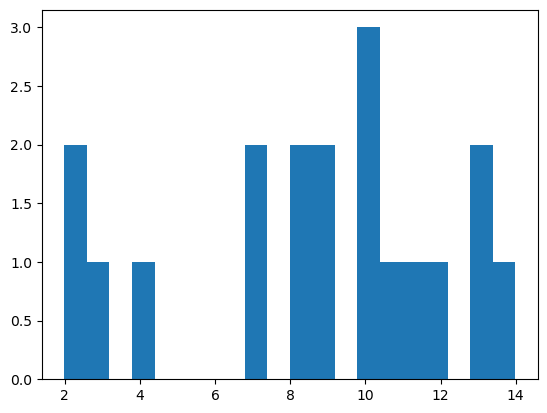

In [347]:
import matplotlib.pyplot as plt
plt.hist(price, bins=20)

In [12]:
proxies = pd.read_csv('working_proxies.csv')
ip_address, port = proxies['IP'].values, proxies['Port'].values
proxies = {'http': [f'http://{ip}:{port}' for ip, port in zip(ip_address, port)],
           'https': [f'https://{ip}:{port}' for ip, port in zip(ip_address, port)]}

amazon_headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'DNT': '1',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'none',
    'Sec-Fetch-User': '?1',
    'Cache-Control': 'max-age=0',
    'sec-ch-ua': '"Not_A Brand";v="8", "Chromium";v="120", "Google Chrome";v="120"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"'
}

In [239]:
url = "https://www.google.com"

# Select a random proxy from the list
proxy = random.choice(proxies['http'])
proxy = {'http': 'socks5h://127.0.0.1:9050',
         'https': 'socks5h://127.0.0.1:9050'}

response = requests.get(url, headers = amazon_headers, proxies=proxy, timeout=10)

In [240]:
response

<Response [200]>

In [241]:
bs = BeautifulSoup(response.text, 'html.parser')
print(bs.prettify())

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/WebPage" lang="en-IR">
 <head>
  <meta charset="utf-8"/>
  <meta content="origin" name="referrer"/>
  <link href="//www.gstatic.com/images/branding/searchlogo/ico/favicon.ico" rel="icon"/>
  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
  <style>
   @font-face{font-family:'Google Sans';font-style:normal;font-weight:400 700;font-display:optional;src:url(//fonts.gstatic.com/s/googlesans/v29/4UaGrENHsxJlGDuGo1OIlL3Owp5eKQtG.woff2)format('woff2');unicode-range:U+0000-00FF,U+0131,U+0152-0153,U+02BB-02BC,U+02C6,U+02DA,U+02DC,U+0304,U+0308,U+0329,U+2000-206F,U+20AC,U+2122,U+2191,U+2193,U+2212,U+2215,U+FEFF,U+FFFD;}
  </style>
  <script nonce="mlHeo-HuNANAnOw1eRqjkg">
   (function(){var w=["Google Sans",[400,500,700]];(function(){for(var a=0;a<w.length;a+=2)for(var d=w[a],e=w[a+1],b=0,c=void 0;c=e[b];++b)document.fonts.load(c+" 10pt "+d).catch(function(){})})();})();
  </script>
  <

In [103]:
bs.find('span', {'class': 'a-price-symbol'}).text

'£'

In [59]:
rating = bs.find_all('span', {'class': 'a-icon-alt'})
rating[0].text.split()[0]

'4.6'

In [ ]:
len('<span class="a-offscreen">£')


27

In [90]:
bs.find_all('span', {'class': 'a-offscreen'})[0].text[1:]

'11.00'

In [52]:
w = bs.find_all('span', {'class': "a-price-whole"})
bs.find_all('span', {'class': "a-price-symbol"})
f = bs.find_all('span', {'class': "a-price-fraction"})
len(w) == len(f)

True

In [57]:
float(w[0].text.strip() + f[0].text.strip())

11.0

In [53]:
len(w)

81

In [48]:
product_items = bs.find_all('div', {'data-asin': True, 'class': 's-result-item'})
product_items[0]

<div class="s-result-item s-widget s-widget-spacing-large AdHolder s-flex-full-width" data-asin="" data-index="0" data-uuid="89c61156-7476-4afd-9ed8-0ddaa5ea3117">
<div cel_widget_id="lifestyle-image-v4-creative-desktop_loom-desktop-top-slot_1" class="celwidget pd_rd_w-1tfQO content-id-amzn1.sym.a18126b6-9995-4982-ac44-f6ce57aa9bed:amzn1.sym.a18126b6-9995-4982-ac44-f6ce57aa9bed pf_rd_p-a18126b6-9995-4982-ac44-f6ce57aa9bed pf_rd_r-5NR4A1F4TNQSW6YKM9ED pd_rd_wg-7y1IV pd_rd_r-3c2a7304-3e28-4aaf-99d5-eac58d618dcb c-f" data-csa-c-content-id="amzn1.sym.a18126b6-9995-4982-ac44-f6ce57aa9bed:amzn1.sym.a18126b6-9995-4982-ac44-f6ce57aa9bed" data-csa-c-painter="lifestyle-image-v4-creative-desktop-cards" data-csa-c-slot-id="DsUnknown-2" data-csa-c-type="widget" data-csa-op-log-render=""><script>if(window.mix_csa){window.mix_csa('[cel_widget_id="lifestyle-image-v4-creative-desktop_loom-desktop-top-slot_1"]', '#CardInstanceM_RcVuDQBAMfjaoehRGHVw')('mark', 'bb')}</script>
<script>if(window.uet){window

In [45]:
with open('amazon_response.html', 'w', encoding='utf-8') as f:
    f.write(response.text)